In [3]:
import pandas as pd
import networkx as nx
import powerlaw

In [4]:
data = pd.read_csv('data.csv')

In [5]:
# Initialize an empty directed graph
G = nx.DiGraph()

# Iterate through each row in the dataset
for index, row in data.iterrows():
    # Extract the origin, destination, and other relevant information
    origin = row['ORIGIN']
    destination = row['DEST']
    
    # Check if there's already an edge between the origin and destination
    if G.has_edge(origin, destination):
        # If so, increment the weight (number of flights) by 1
        G[origin][destination]['weight'] += 1
    else:
        # Otherwise, add a new edge with a weight of 1
        G.add_edge(origin, destination, weight=1)


In [6]:
degree_centrality = nx.degree_centrality(G)

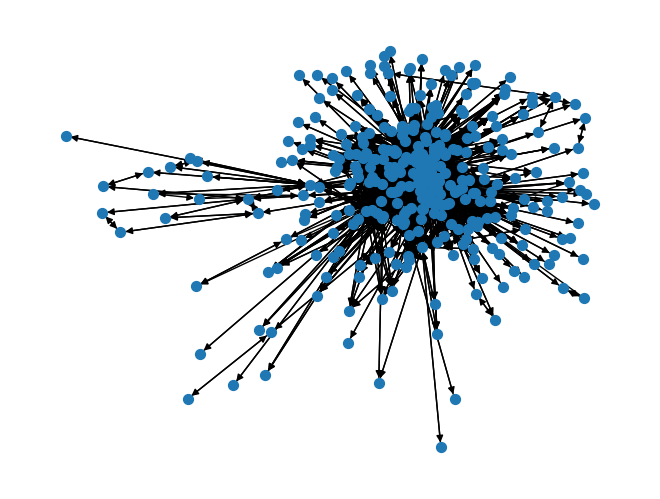

In [7]:
import matplotlib.pyplot as plt

pos = nx.spring_layout(G, seed=42)  # Position nodes using the spring layout algorithm
nx.draw(G, pos, node_size=50, with_labels=False)
plt.show()


In [8]:
nx.write_gexf(G, 'air_transport_network.gexf')

### Number of Nodes and Edges

In [9]:
N = G.number_of_nodes()
L = G.number_of_edges()

In [10]:
print(L,N)

5535 346


### Average Degree

In [11]:
total_degrees = sum([G.in_degree(node) + G.out_degree(node) for node in G.nodes()])
average_degree = total_degrees / N

In [12]:
print(average_degree)

31.99421965317919


### Average Squared degree in and out

In [13]:
average_squared_in_degree = sum([G.in_degree(node) ** 2 for node in G.nodes()]) / N
average_squared_out_degree = sum([G.out_degree(node) ** 2 for node in G.nodes()]) / N
print(average_squared_in_degree,average_squared_out_degree)

991.864161849711 989.5231213872833


In [14]:
# Get the in-degree and out-degree lists
in_degrees = [G.in_degree(node) for node in G.nodes()]
out_degrees = [G.out_degree(node) for node in G.nodes()]

# Fit a power-law distribution to the in-degree and out-degree data
in_degree_fit = powerlaw.Fit(in_degrees, discrete=True)
out_degree_fit = powerlaw.Fit(out_degrees, discrete=True)

# Get the in-degree and out-degree exponents (γin and γout)
gamma_in = in_degree_fit.alpha
gamma_out = out_degree_fit.alpha


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


In [15]:
print(gamma_in, gamma_out)

1.5650876201094814 1.5677134160959834


### Degree Distribution

In [16]:
# Calculate the total degree of each node (sum of in-degree and out-degree)
degrees = [G.in_degree(node) + G.out_degree(node) for node in G.nodes()]

# Count the occurrences of each degree value
degree_counts = {}
for degree in degrees:
    if degree in degree_counts:
        degree_counts[degree] += 1
    else:
        degree_counts[degree] = 1


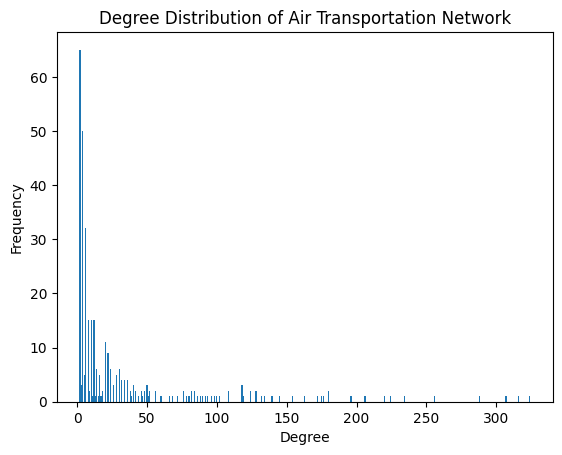

In [17]:
# Create a bar plot of the degree distribution
plt.bar(degree_counts.keys(), degree_counts.values())

# Set the plot title and axis labels
plt.title("Degree Distribution of Air Transportation Network")
plt.xlabel("Degree")
plt.ylabel("Frequency")

# Display the plot
plt.show()


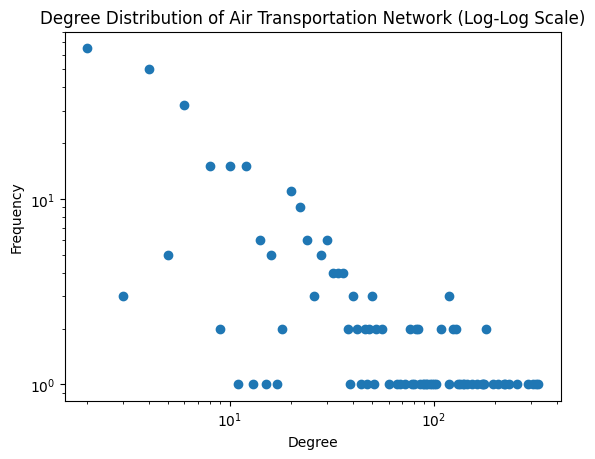

In [18]:
# Convert the degree and frequency values to lists for easier plotting
degree_values = list(degree_counts.keys())
frequency_values = list(degree_counts.values())

# Create a log-log scatter plot of the degree distribution
plt.loglog(degree_values, frequency_values, 'o')

# Set the plot title and axis labels
plt.title("Degree Distribution of Air Transportation Network (Log-Log Scale)")
plt.xlabel("Degree")
plt.ylabel("Frequency")

# Display the plot
plt.show()


### Showing airports that flights (degrees) >= average_degree

In [19]:
print("Average degree is {}".format(average_degree))

node_degrees = [(node, degree) for node, degree in G.degree() if degree >= average_degree]
top_node_degrees = sorted(node_degrees, key=lambda item: item[1], reverse=True)

print("Total number of nodes is {}".format(len(G.nodes())))
print("Number of top nodes is {}".format(len(top_node_degrees)))

Average degree is 31.99421965317919
Total number of nodes is 346
Number of top nodes is 87


### Printing...

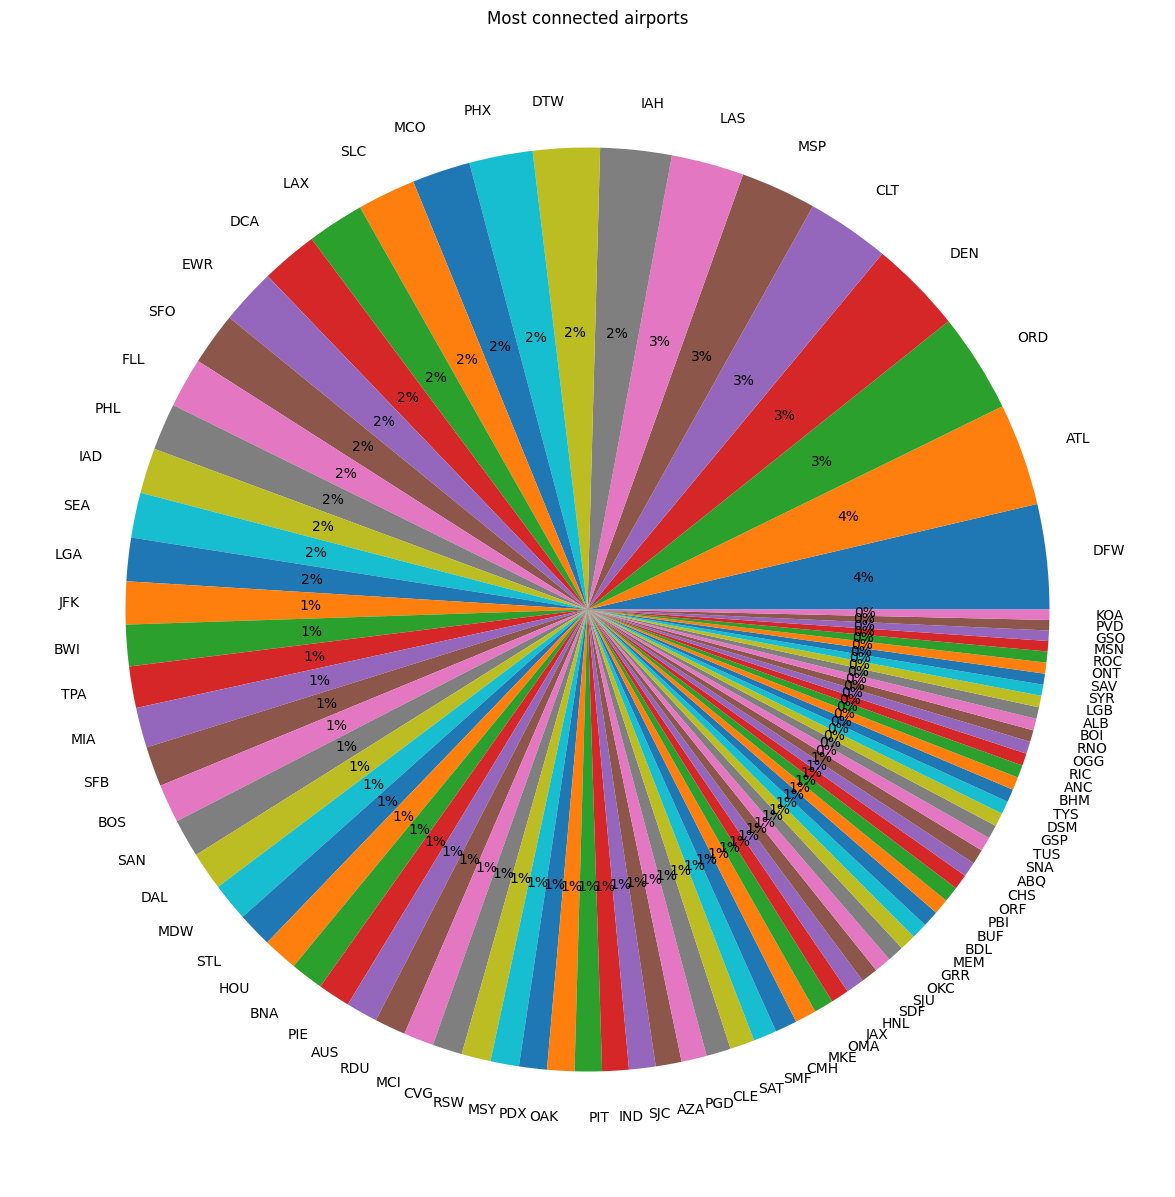

In [20]:
nodes = [node   for node, degree in top_node_degrees]
degrees = [degree for node, degree in top_node_degrees]

plt.figure(figsize=(15, 15))
plt.pie(degrees, labels=nodes, autopct='%1.0f%%')
plt.title("Most connected airports")
plt.show()

### Describing airport hubs

In [21]:
most_connected_airport: str = top_node_degrees[0][0]

G_temp = nx.DiGraph()
G_temp.add_node(most_connected_airport)

G_temp.nodes()

for neighbor in G.neighbors(most_connected_airport):
    G_temp.add_edge(most_connected_airport, neighbor)

    if G.has_edge(neighbor, most_connected_airport):
        G_temp.add_edge(neighbor, most_connected_airport)

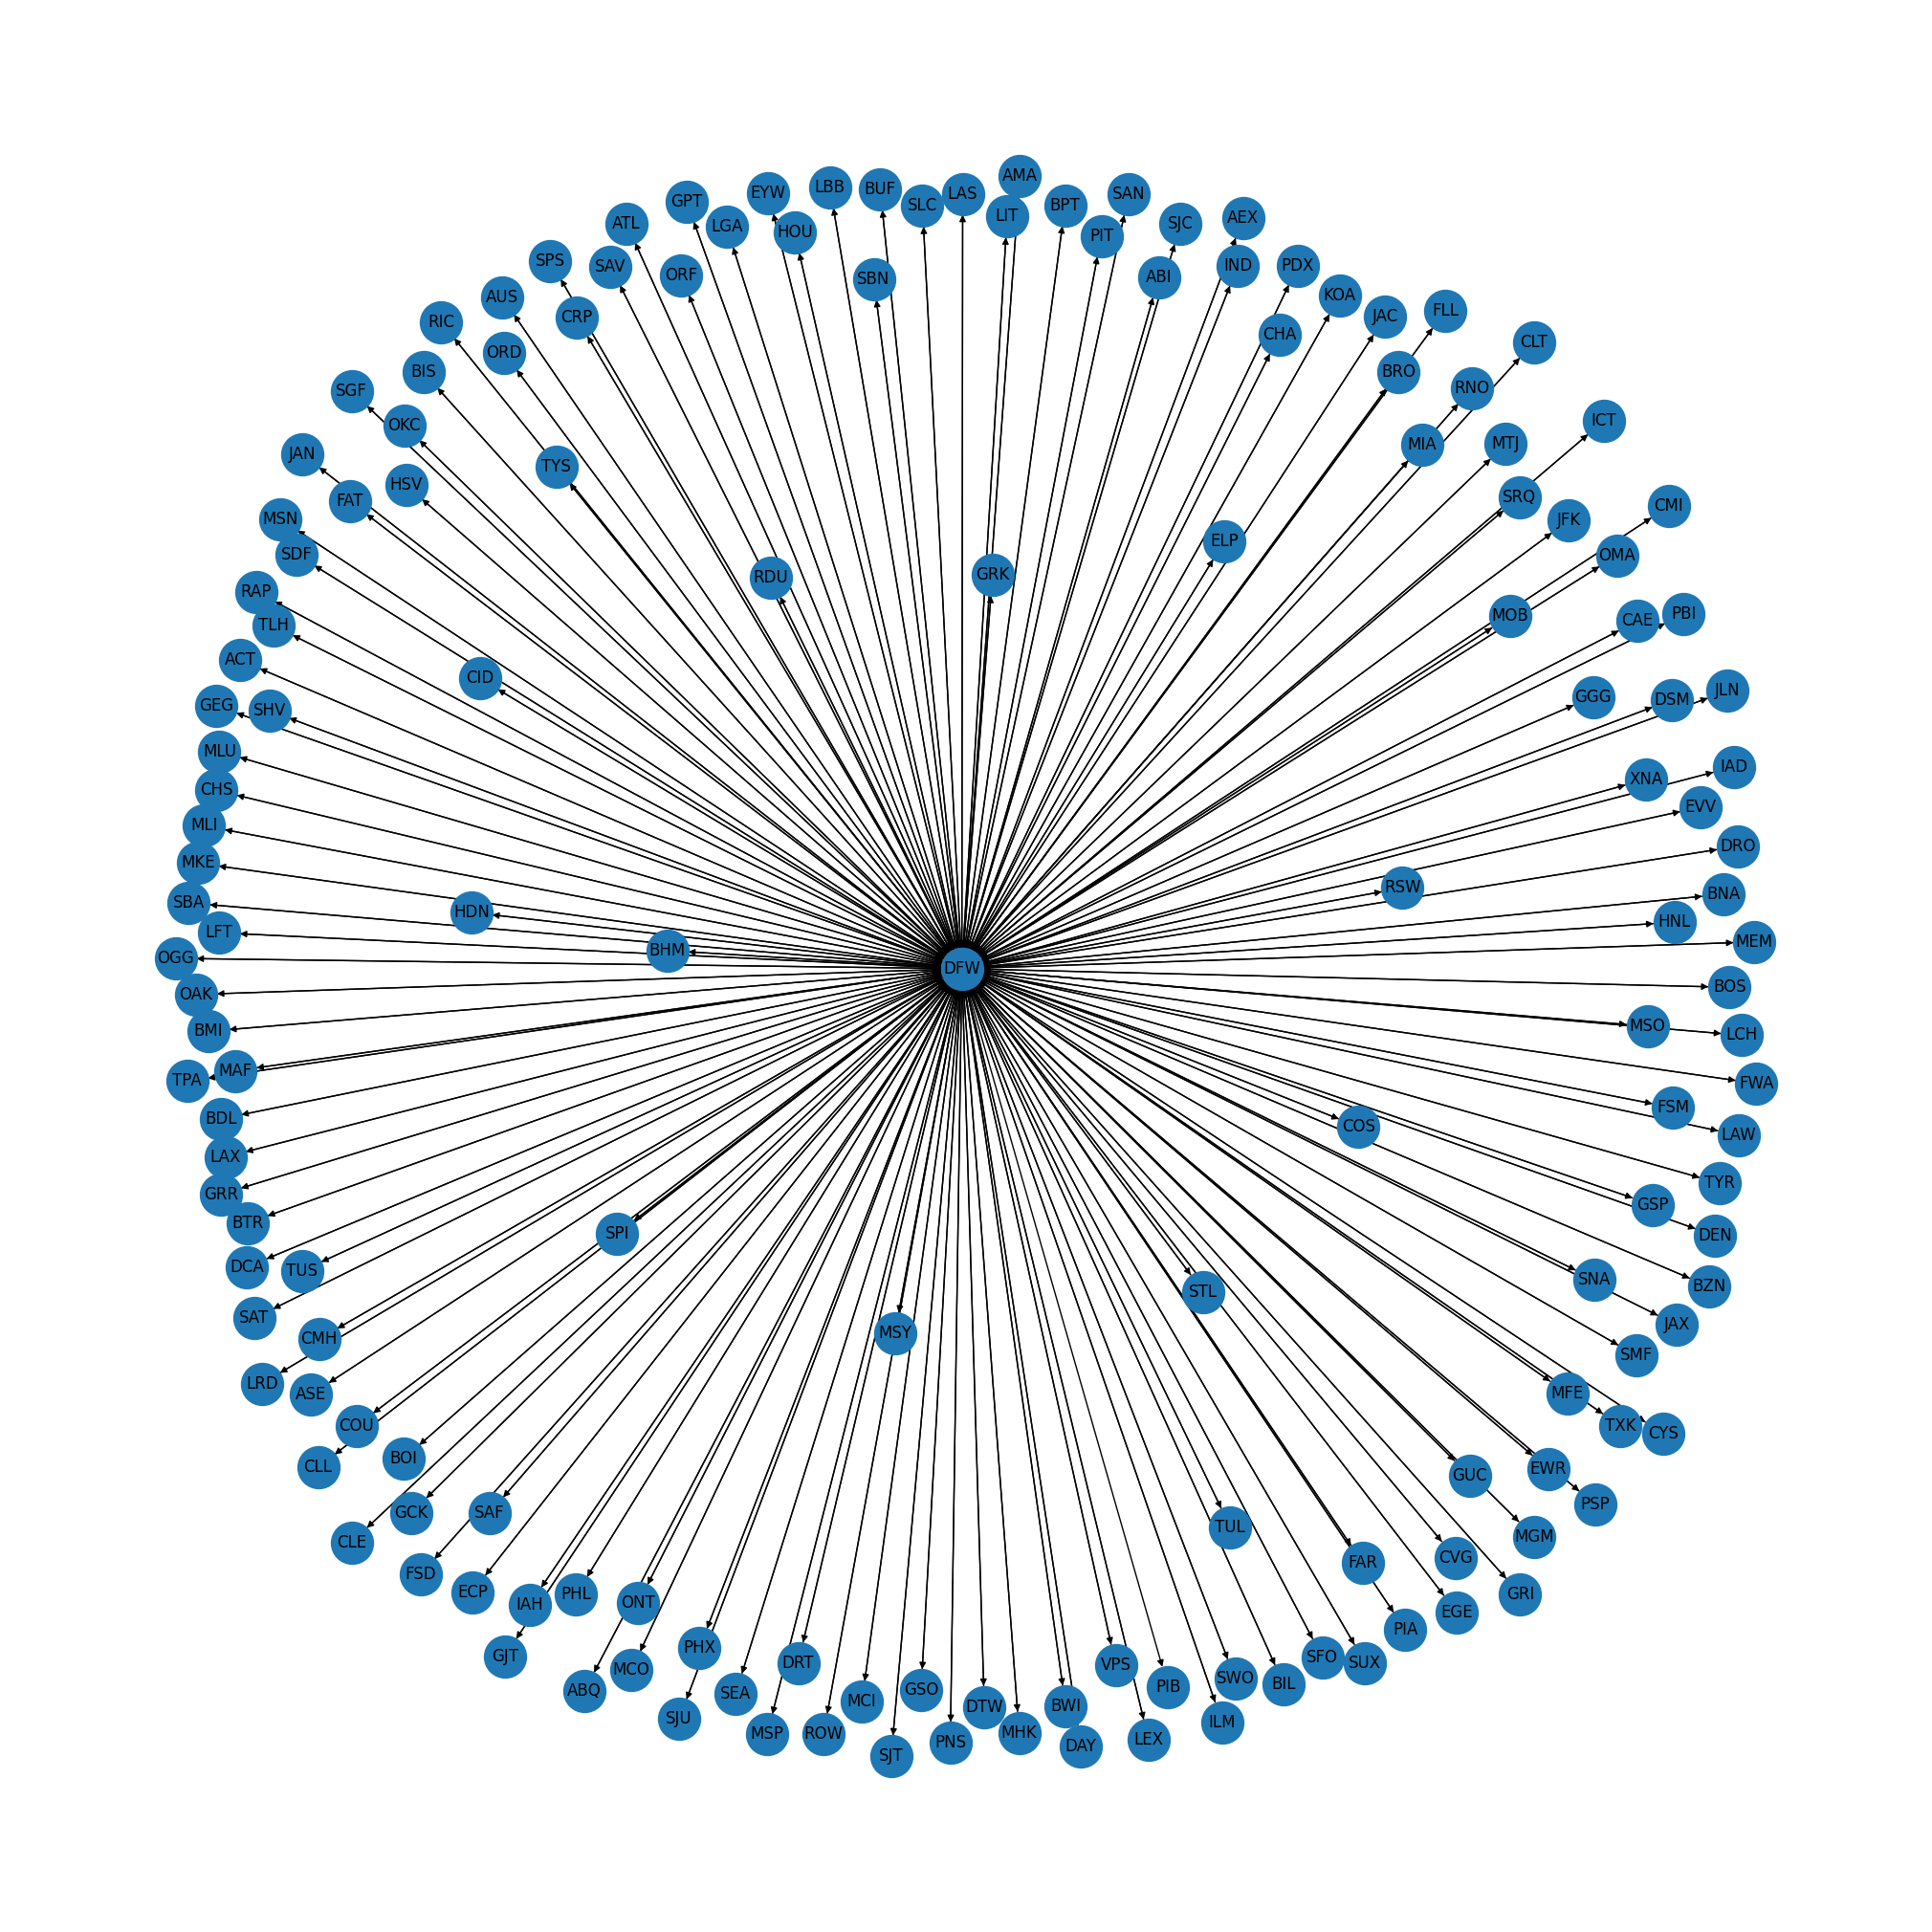

In [22]:
plt.figure(figsize=(20, 20))
pos = nx.spring_layout(G_temp, k=0.9, seed=70) 
nx.draw(G_temp, pos, node_size=1000, with_labels=True)
plt.show()

### Generating graphic visualization for all nodes that degree >= average_degree

In [23]:
import os

In [40]:
need_generate_images = len(os.listdir("./hubs/images")) == 0

if (not need_generate_images):
    print("All the hubs images are generated")
else:
    for node, _ in top_node_degrees:
        G_temp = nx.DiGraph()
        G_temp.add_node(node)

        for neighbor in G.neighbors(node):
            G_temp.add_edge(node, neighbor)

            if G.has_edge(neighbor, node):
                G_temp.add_edge(neighbor, node)
        
        plt.figure(figsize=(20, 20))
        pos = nx.spring_layout(G_temp, k=0.9, seed=70) 
        nx.draw(G_temp, pos, node_size=1000, with_labels=True)
        plt.savefig("./hubs/images/{}.png".format(node))

        print("## Airport: {}".format(node))
        print("")
        print("Connections: ")
        print("")
        number_of_neighbours = len(list(G_temp.neighbors(node)))
        for i, n in enumerate(G_temp.neighbors(node)):
            if (i+1) % 4 != 0:
                if (i+1) == number_of_neighbours:
                    print("{}".format(n), end='')
                else:
                    print("{}, ".format(n), end='')
            else:
                print("{}".format(n))
        print("")
        print("![{0}](./images/{0}.png)".format(node))
        print("")

All the hubs images are generated
